# 降维

## 降维的主要方法

* __投影__
* __流式学习__

### 投影

训练实例并不是在所有维度上均匀分布的。许多特征几乎是常 数，而其他特征则高度相关，所有训练实例实际上位于（或 接近）高维空间的低维子空间内，此时我们就可以通过投影的方式实现降维，但是投影并不总是降维的最佳方法。在很多情况下，子空间可能会扭曲和转动，比如 `瑞士卷数据集`。

### 流式学习

许多降维算法通过对训练实例所在的流形进行建模从而达到降维目的；这叫做 `流形学习` 。。它依赖于 `流形猜想（manifold	assumption）`，也被称为 `流形假设（manifold	hypothesis）`，__它认为大多数现实世界的高维数据集大都靠近一个更低维的流形__。

### 降维必定带来信息流失

因此即使这种方法可以加快训练的速度，同时也会让你的系统表现的稍微差一点。降维会让你的工作流水线更复杂因而更难维护，__所以你应该先尝试使用原始的数据来训练，如果训练速度太慢的话再考虑使用降维__。

__在某些情况下，降低训练集数据的维度可能会筛选掉一些噪音和不必要的细节，这可能会让你的结果比降维之前更好__ (`这种情况通常不会发生；它只会加快你训练的速度`)

## PCA 降维

可以手动实现或者使用相关的工具库，但是值得注意的是：__如果自己手动实现需要先将数据进行中心化，因为PCA默认将原点设为数据集的中心。当然在sklearn 中已经内置了中心化操作了。__

Sklearn 中的 PCA 借助的是 SVD 奇异值分解来进行降维，通过奇异值分解有如下公式：
<br/>
<br/>

<div><img src="./static/1.jpg"/></div>

通过求得 VT ，之后通过 X * VT 来实现 PCA 降维，如下这般：
    
    W2=V.T[:,:2] 
    X2D=X_centered.dot(W2)

### Sklearn PCA 参数

pca = PCA(n_components=2) # 用于指定降维降到多少维数


In [6]:
from sklearn.decomposition import PCA
import pandas as pd 
import numpy as np

D:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [24]:
df = pd.read_excel('data1.xlsx')
# df.rename(columns = ['叉烧粉','手抓饭','四川火锅','烧鹅饭','大盘鸡面','饺子','辣子鸡','虾饺','芋头','拉面','羊排'])
df.columns = ['叉烧肠粉','手抓饭','四川火锅','粤式烧鹅饭','大盘鸡面','东北饺子','辣子鸡','虾饺','剁椒鱼头','拉面','烤羊排']
df.head()

,叉烧肠粉,手抓饭,四川火锅,粤式烧鹅饭,大盘鸡面,东北饺子,辣子鸡,虾饺,剁椒鱼头,拉面,烤羊排
0,5,2,1,4,0,0,2,4,0,0,0
1,0,0,0,0,0,0,0,0,0,3,0
2,1,0,5,2,0,0,3,0,3,0,1
3,0,5,0,0,4,0,1,0,0,0,0
4,0,0,0,0,0,4,0,0,0,4,0


In [25]:
df = df.values
pca = PCA(n_components=6)
x2d = pca.fit_transform(df)

In [26]:
x2d.shape # 确实对 列进行了降维

(18, 6)

### 获取主成分

将 PCA 转化器应用于数据集后，可以使用	components\_ 访问每一个主成分（注意，它返回以 PC 作为水平向量的矩阵）。

__因此，如果我们想要获得第一个主成分则可以写成 pca.components_.T[:,0]	）。__


In [27]:
pca.components_.T[:,0]

array([ 0.47281716, -0.11909009,  0.09948576,  0.42283641, -0.33738227,
       -0.37166447,  0.07977898,  0.49253256,  0.04107784, -0.16846714,
       -0.20637485])

### 主成分的方差解释率

通过	`explained_variance_ratio_`	变量可获得 `方差解释率`

In [28]:
pca.explained_variance_ratio_

array([0.30212399, 0.22418413, 0.20896728, 0.08998496, 0.05769633,
       0.04032614])

### 选择正确的维度

通常我们倾向于选择加起来到 `方差解释率` 能够达到足够占比（例如 `95%`）的维度的数量，而不是任意选择要降低到的维度数量。

下面的代码在 __不降维__ 的情况下进行 __PCA__ ，然后计算出保留训练集方差 `95%` 所需的最小维数：

In [33]:
pca = PCA()
pca.fit(df)
cumsum = np.cumsum(pca.explained_variance_ratio_) # 按行累加数据 比如[1,2,3] 累加得到 [1,3,6]
d = np.argmax(cumsum>=0.95)+1
d

8

### 绘制方差解释率

In [35]:
import matplotlib.pyplot as plt

In [49]:
x = [ i for i in  range(1,df.shape[1]+1)]
y = [ i for i in  np.arange(0,1,0.2)]

In [50]:
y

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8]

In [98]:
var1 = pd.DataFrame(cumsum,columns=['var'],index= [i for i in range(1,12)])
var1.head()

,var
1,0.302124
2,0.526308
3,0.735275
4,0.825260
5,0.882957


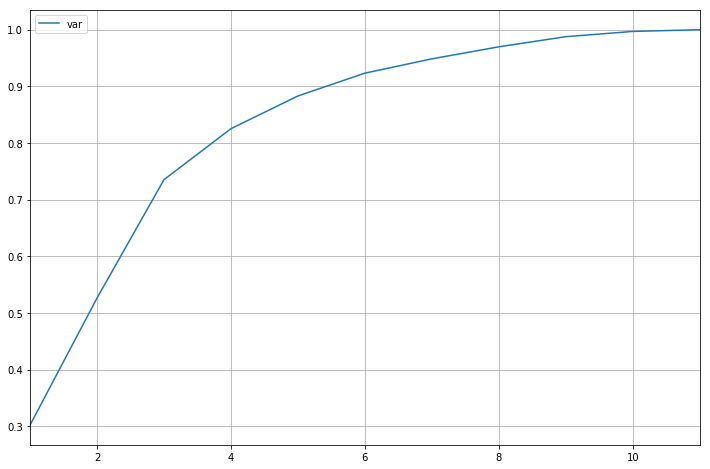

In [97]:
var1.plot(figsize=(12,8),grid=True) # 或者使用 plt.plot(var1.index,var1.values)

#### 现在知道了要降到8维才能获取大于等于95%的方差接受率，那么接下来就可以通过重新生成 `PCA(n_components=8)` 来进行降维了。

In [34]:
pca = PCA(n_components=6)
x2d = pca.fit_transform(df)